In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [50]:
import os

logs_path = os.path.join(os.getcwd(), '2d_mnist_dnn_tensorboard')

In [51]:
with tf.name_scope("input"):
    input_images = tf.placeholder(tf.float32, shape=[None, mnist.train.images.shape[1]])
    input_labels = tf.placeholder(tf.float32, shape=[None, mnist.train.labels.shape[1]])

print(input_images.shape)
print(input_labels.shape)

(?, 784)
(?, 10)


In [52]:
hidden_units = 768
with tf.name_scope("weights"):
    input_weights = tf.Variable(tf.random_normal([int(input_images.shape[1]), hidden_units]))

with tf.name_scope("biases"):
    input_biases = tf.Variable(tf.constant(0.1, shape=[hidden_units])) # can avoid dead neuros by adding initial bias

In [53]:
with tf.name_scope("hidden_layer_wb"):
    hidden_weights = tf.Variable(tf.random_normal([hidden_units, 10]))
    hidden_biases = tf.Variable(tf.constant(0.1, shape=[10]))

with tf.name_scope("hidden_layer_cau"):
    input_layer = tf.matmul(input_images, input_weights) + input_biases
    input_dropout = tf.nn.dropout(input_layer, 0.5)
    input_active = tf.nn.relu(input_layer)

    logits = tf.matmul(input_active, hidden_weights) + hidden_biases

In [54]:
with tf.name_scope("cost"):
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=input_labels))

In [55]:
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(0.4).minimize(loss_function)

In [56]:
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(input_labels,axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [57]:
tf.summary.scalar("cost", loss_function)
tf.summary.scalar("accuracy", accuracy)
# command line for tensorboard $tensorboard --logdir=train:`logs_path`/train,test:`logs_path`/test --port 6006
# merge all summaries into a single "operation" which can execute in a session
summary_all = tf.summary.merge_all()

In [63]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# create training logs for tensorflow
train_writer = tf.summary.FileWriter(os.path.join(logs_path, 'train'), graph=tf.get_default_graph())
test_writer = tf.summary.FileWriter(os.path.join(logs_path, 'test'), graph=tf.get_default_graph())

with sess.as_default():
    for i in range(10):
        print("Epoch", i+1)
        for x in range(int(mnist.train.num_examples/128)+1):
            batch = mnist.train.next_batch(128)
            _, train_sum = sess.run([optimizer, summary_all], feed_dict={input_images: batch[0], input_labels: batch[1]})
            if ((x+1) % 100 == 0):
                print("\tTraining batch " + str(x+1), end='')
                ac, test_sum = sess.run([accuracy, summary_all], feed_dict={input_images: mnist.test.images, input_labels: mnist.test.labels})
                print(" Accuracy: " + str(ac))
                train_writer.add_summary(train_sum, (i+1)*(int(mnist.train.num_examples/128)+1)+x+1)
                test_writer.add_summary(test_sum, (i+1)*(int(mnist.train.num_examples/128)+1)+x+1 )
                train_writer.flush()
                test_writer.flush()
       
    

Epoch 1
	Training batch 100 Accuracy: 0.8822
	Training batch 200 Accuracy: 0.9008
	Training batch 300 Accuracy: 0.9116
	Training batch 400 Accuracy: 0.9157
Epoch 2
	Training batch 100 Accuracy: 0.9215
	Training batch 200 Accuracy: 0.9283
	Training batch 300 Accuracy: 0.9284
	Training batch 400 Accuracy: 0.9327
Epoch 3
	Training batch 100 Accuracy: 0.9343
	Training batch 200 Accuracy: 0.936
	Training batch 300 Accuracy: 0.9362
	Training batch 400 Accuracy: 0.9358
Epoch 4
	Training batch 100 Accuracy: 0.9364
	Training batch 200 Accuracy: 0.9351
	Training batch 300 Accuracy: 0.9407
	Training batch 400 Accuracy: 0.9369
Epoch 5
	Training batch 100 Accuracy: 0.9387
	Training batch 200 Accuracy: 0.9392
	Training batch 300 Accuracy: 0.9394
	Training batch 400 Accuracy: 0.9387
Epoch 6
	Training batch 100 Accuracy: 0.9408
	Training batch 200 Accuracy: 0.9405
	Training batch 300 Accuracy: 0.9408
	Training batch 400 Accuracy: 0.9415
Epoch 7
	Training batch 100 Accuracy: 0.9425
	Training batch 200 

In [39]:
# start up tensorboard using $ tensorboard --logdir=/Users/shijian/git/3D-CNN/2d_mnist_dnn_tensorboard/ --port 6006
# To see if the summary writer works well
for i in tf.train.summary_iterator(logs_path + '/events.out.tfevents.1508854176.host-163-117.eduroam-local.wifi.le.ac.uk'):
    print(i)

wall_time: 1508854176.0
file_version: "brain.Event:2"

wall_time: 1508854176.992708
graph_def: "\nd\n\021input/Placeholder\022\013Placeholder*(\n\016_output_shapes\022\026\n\024:\022\022\013\010\377\377\377\377\377\377\377\377\377\001\022\003\010\220\006*\013\n\005shape\022\002:\000*\013\n\005dtype\022\0020\001\ne\n\023input/Placeholder_1\022\013Placeholder*\'\n\016_output_shapes\022\025\n\023:\021\022\013\010\377\377\377\377\377\377\377\377\377\001\022\002\010\n*\013\n\005shape\022\002:\000*\013\n\005dtype\022\0020\001\nl\n\033weights/random_normal/shape\022\005Const*\032\n\016_output_shapes\022\010\n\006:\004\022\002\010\002*\035\n\005value\022\024B\022\010\003\022\004\022\002\010\002\"\010\020\003\000\000\000\003\000\000*\013\n\005dtype\022\0020\003\n_\n\032weights/random_normal/mean\022\005Const*\026\n\016_output_shapes\022\004\n\002:\000*\025\n\005value\022\014B\n\010\001\022\000*\004\000\000\000\000*\013\n\005dtype\022\0020\001\na\n\034weights/random_normal/stddev\022\005Const*\0

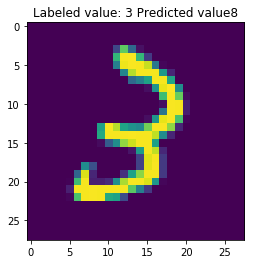

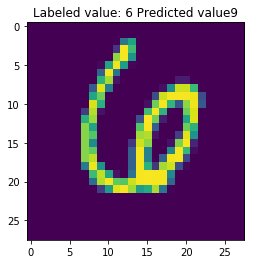

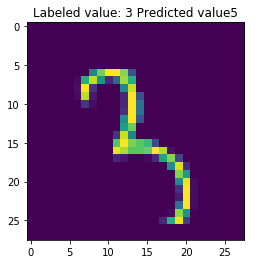

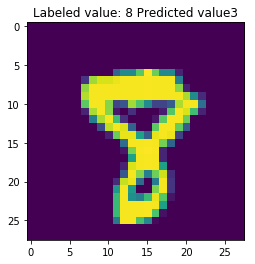

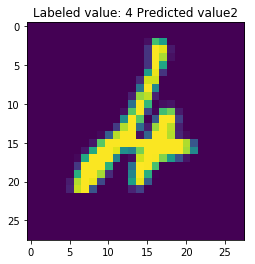

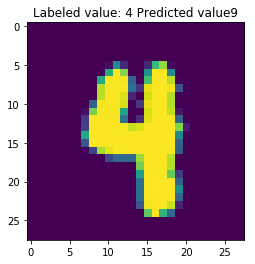

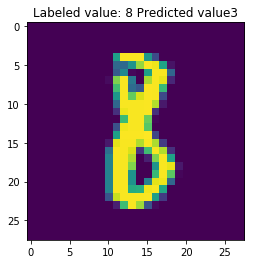

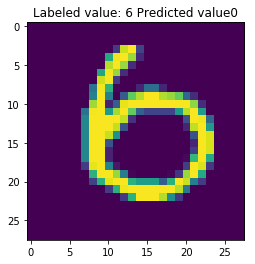

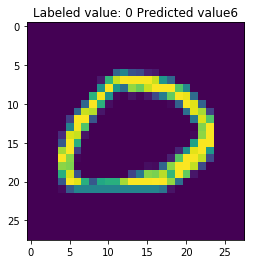

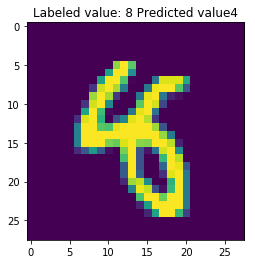

In [24]:
import numpy as np
with sess.as_default():
    for i in range(300):
        acc, res = sess.run([correct_prediction, logits], feed_dict={input_images: mnist.test.images[i: i+1], input_labels: mnist.test.labels[i:i+1]})
        if acc == False:
            fig = plt.figure()
            ax = fig.add_subplot()
            plt.title("Labeled value: "+ str(np.argmax(mnist.test.labels[i:i+1])) + " Predicted value"+ str(np.argmax(res)))
            plt.imshow(mnist.test.images[i:i+1].reshape([28, 28]))

# CNN

In [25]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1, seed=1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [26]:
input_images = tf.placeholder(tf.float32, shape=[None, mnist.train.images.shape[1]])
input_labels = tf.placeholder(tf.float32, shape=[None, mnist.train.labels.shape[1]])

In [27]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(input_images, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [28]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [29]:
W_conv3 = weight_variable([5, 5, 64, 128])
b_conv3 = bias_variable([128])

h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3)

In [30]:
# W_fc1 = weight_variable([4 * 4 * 128, 1024])
# b_fc1 = bias_variable([1024])
# h_pool2_flat = tf.reshape(h_pool3, [-1, 4*4*128])

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [31]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [32]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [34]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=input_labels, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, axis=1), tf.argmax(input_labels, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

with sess.as_default():
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={input_images: batch[0], input_labels: batch[1], keep_prob: 0.5})
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={input_images: batch[0], input_labels: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))

    print('test accuracy %g' % accuracy.eval(feed_dict={input_images: mnist.test.images, input_labels: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 100, training accuracy 0.84
step 200, training accuracy 0.86
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 0.97
step 800, training accuracy 0.94
step 900, training accuracy 0.98
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.99
step 1400, training accuracy 0.97
step 1500, training accuracy 0.96
step 1600, training accuracy 0.99
step 1700, training accuracy 0.97
step 1800, training accuracy 0.98
step 1900, training accuracy 0.96
step 2000, training accuracy 0.97
step 2100, training accuracy 0.96
step 2200, training accuracy 0.97
step 2300, training accuracy 1
step 2400, training accuracy 0.96
step 2500, training accuracy 1
step 2600, training accuracy 1
step 2700, training accuracy 1
step 2800, training accuracy 0.99
step 2900, training accuracy 0.97
step

/Users/shijian/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


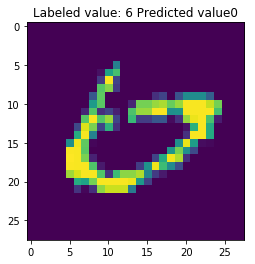

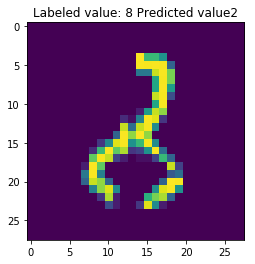

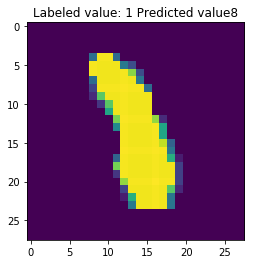

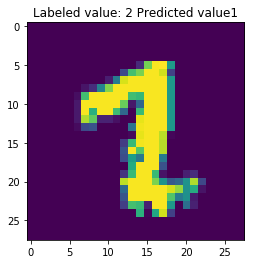

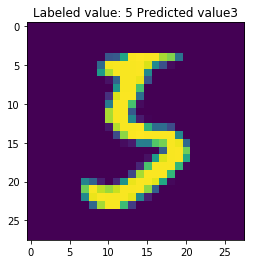

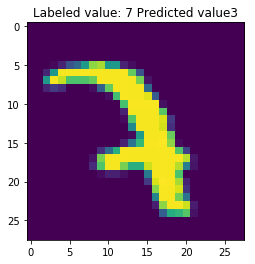

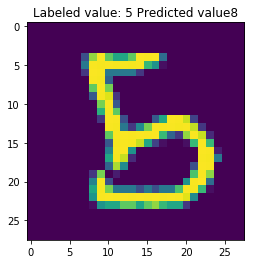

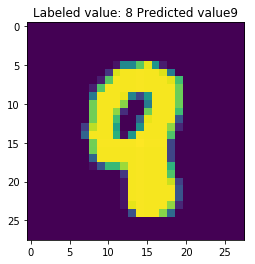

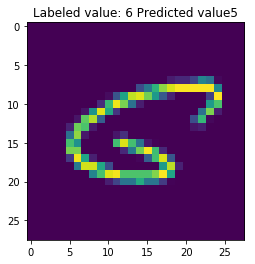

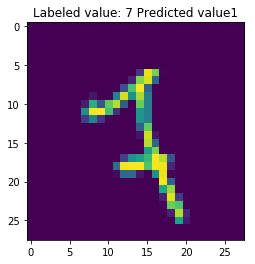

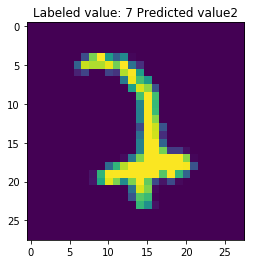

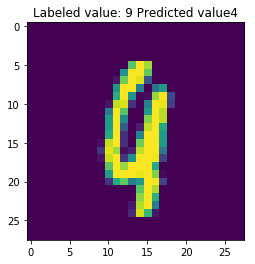

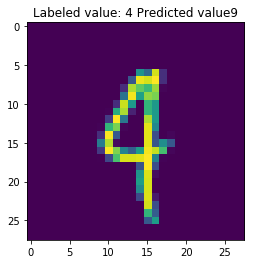

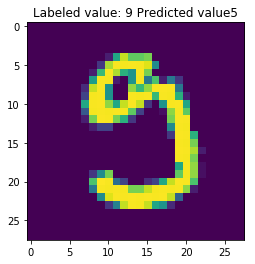

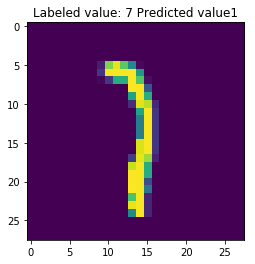

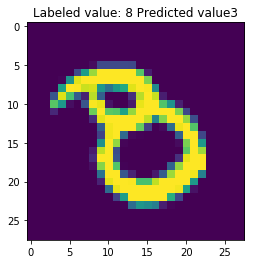

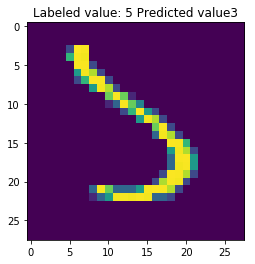

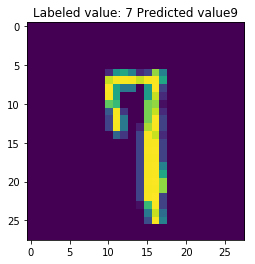

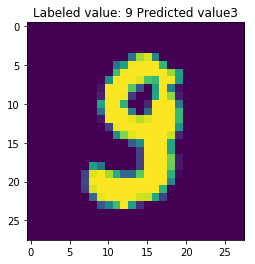

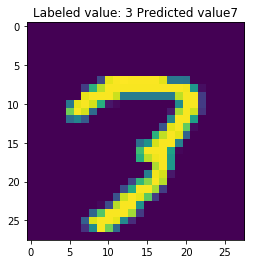

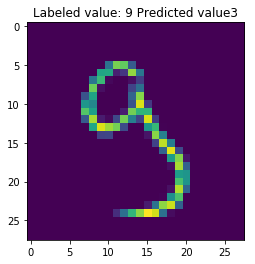

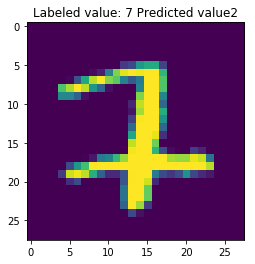

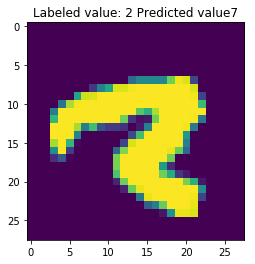

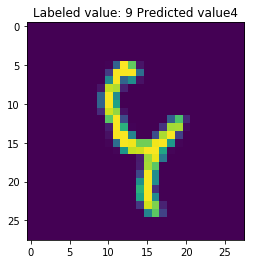

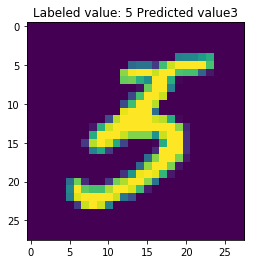

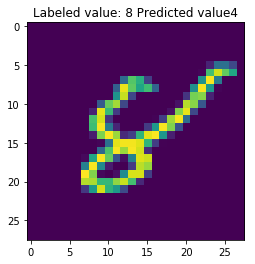

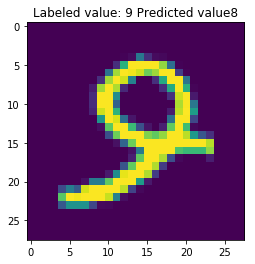

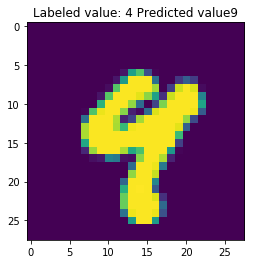

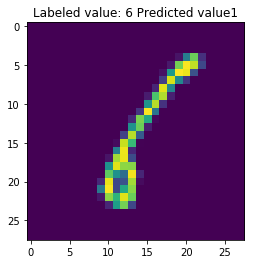

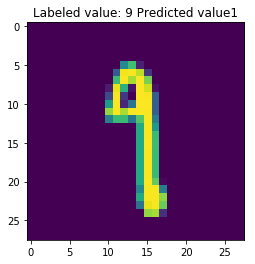

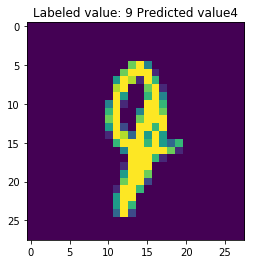

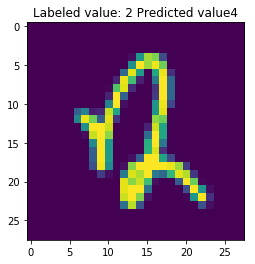

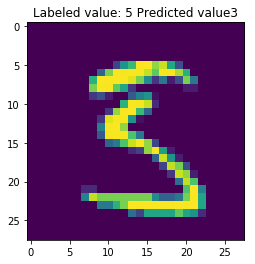

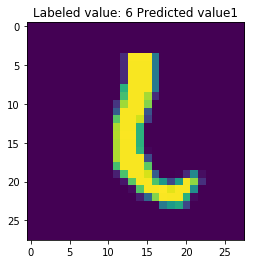

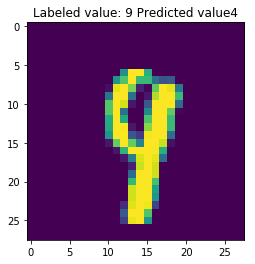

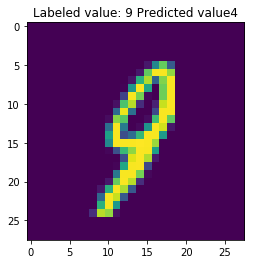

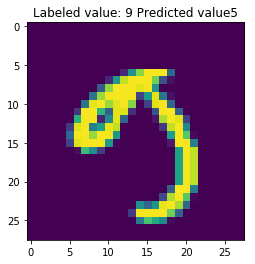

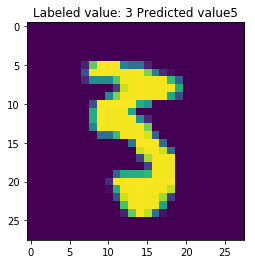

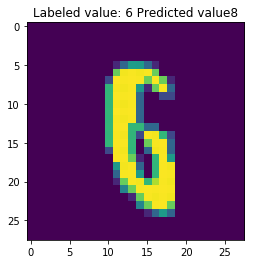

In [40]:
import numpy as np

with sess.as_default():
    for i in range(3000):
        acc, res = sess.run([correct_prediction, y_conv], feed_dict={input_images: mnist.test.images[i: i+1], input_labels: mnist.test.labels[i:i+1], keep_prob: 1.0})
        if acc == False:
            fig = plt.figure()
            ax = fig.add_subplot()
            plt.title("Labeled value: "+ str(np.argmax(mnist.test.labels[i:i+1])) + " Predicted value"+ str(np.argmax(res)))
            plt.imshow(mnist.test.images[i:i+1].reshape([28, 28]))